# 1. My Views About the Problem Statement

I found the problem statement to be both challenging and engaging. It required not just the application of various machine learning algorithms but also a thorough exploration of data preprocessing techniques and outlier management. The task of optimizing the models and comparing their performance added a practical aspect to the project, making it a highly educational experience.

# 2. My Approach to Solving This Task

- **Data Preprocessing**: Addressing missing values, identifying and managing outliers, and normalizing features.
- **Model Implementation**: Deploying a range of machine learning models, including Linear Regression, Ridge Regression, Lasso Regression, Random Forest, KNN, XGBoost, and AdaBoost.
- **Model Optimization**: Utilizing Grid Search for hyperparameter tuning and assessing models based on R² scores.
- **Evaluation**: Comparing the models based on their performance on both training and test data, with a particular focus on R² scores.

# 3. Available ML Model Options I Had to Perform This Task

- **Linear Models**: Including Linear Regression (both single and multiple features), Ridge Regression, and Lasso Regression.
- **Tree-Based Models**: Random Forest and XGBoost, known for their robustness against overfitting.
- **Instance-Based Learning**: K-Nearest Neighbors (KNN), which depends on distance calculations.
- **Ensemble Methods**: AdaBoost, which aggregates multiple weak learners to form a strong learner. Additionally, I explored model optimization methods like Grid Search to fine-tune these models for improved performance.




## 4. Model Evaluation and Insights

Among the various models assessed, **Random Forest** emerges as the top performer. Its R² score on the test data stands at 0.6518, outperforming other models in this comparison:

- **Ridge Regression:** Testing R² = 0.5367
- **Lasso Regression:** Testing R² = 0.5367
- **AdaBoost:** Testing R² = 0.6181

### Reasons for the Superior Performance of Random Forest

1. **Non-Linearity Adaptation:** Random Forest is adept at capturing complex, non-linear relationships between predictors and the target variable, which may be advantageous when the data exhibits intricate patterns that linear models might miss.

2. **Feature Evaluation:** The model assesses feature importance and can handle interactions between variables effectively, providing a more accurate fit than linear approaches like Ridge and Lasso Regression.

3. **Ensemble Technique:** By averaging predictions from multiple decision trees, Random Forest mitigates overfitting and enhances generalization, making its predictions more reliable and robust.

4. **Hyperparameter Optimization:** The performance of Random Forest can be further refined by tuning parameters such as the number of trees, tree depth, and the minimum samples per split, which can optimize model performance.

## 5. Strategies for Enhancing Random Forest Performance

1. **Optimize Hyperparameters:**
   - **Search Techniques:** Utilize Grid Search or Random Search to explore a broader range of hyperparameters, including variations in `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`. This approach helps in finding the best parameter settings for the model.
   - **Cross-Validation:** Implement cross-validation to assess the model’s performance across various subsets of the dataset, ensuring a robust evaluation.

2. **Feature Engineering:**
   - **Feature Selection:** Focus on identifying and retaining key features while eliminating redundant or irrelevant ones to improve model efficiency and performance.
   - **Feature Creation:** Generate new features or modify existing ones using domain knowledge to better capture significant patterns within the data.

3. **Expand Training Data:**
   - **Data Collection:** Increasing the volume of training data can enhance the model’s learning and generalization. Incorporate additional data if available to boost model performance.

4. **Combine Models:**
   - **Model Stacking:** Explore combining Random Forest with other algorithms through stacking to leverage the strengths of different models, which can often lead to superior overall performance.

5. **Regularization Approaches:**
   - **Constraints and Techniques:** Although Random Forest is generally resilient to overfitting, applying regularization techniques or model constraints can sometimes further enhance performance.

By following these recommendations, you can optimize the Random Forest model’s performance and achieve even more impressive results.



In [33]:
# Import necessary libraries for data manipulation, analysis, and modeling
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
!pip install scikit-learn pandas xgboost matplotlib numpy seaborn


## Data Collection

In [34]:
# Read the dataset from a CSV file into a DataFrame
ml_case_study = pd.read_csv("ML case Study.csv")
colleges = pd.read_csv("Colleges.csv")
cities = pd.read_csv("cities.csv")

In [35]:
Tire1 = colleges['Tier 1'].tolist()
Tire2 = colleges['Tier 2'].tolist()
Tire3 = colleges['Tier 3'].tolist()

metro = cities["Metrio City"].tolist()
nonmetro=cities["non-metro cities"].tolist()



for i in ml_case_study.College:
    if i in Tire1:
        ml_case_study["College"].replace(i,"Tire1",inplace=True)
    elif i in Tire2:
        ml_case_study["College"].replace(i,"Tire2",inplace=True)
    elif i in Tire3:
        ml_case_study["College"].replace(i,"Tire3",inplace=True)

for c in ml_case_study.City:
    if c in metro:
        ml_case_study["City"].replace(c,'Metro',inplace=True)
    elif c in nonmetro:
        ml_case_study["City"].replace(c,'Non_Metro',inplace=True)

df = ml_case_study
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,Tire2,Non_Metro,Manager,55523.0,3,66,19,71406.58
1,Tire2,Non_Metro,Executive,57081.0,1,84,18,68005.87
2,Tire3,Non_Metro,Executive,60347.0,2,52,28,76764.02
3,Tire3,Non_Metro,Executive,49010.0,2,81,33,82092.39
4,Tire1,Non_Metro,Executive,57879.0,4,74,32,73878.10


## Data Cleaning And Data Transformation

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [37]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


* It seems like the data contains outliers
* lets check for them


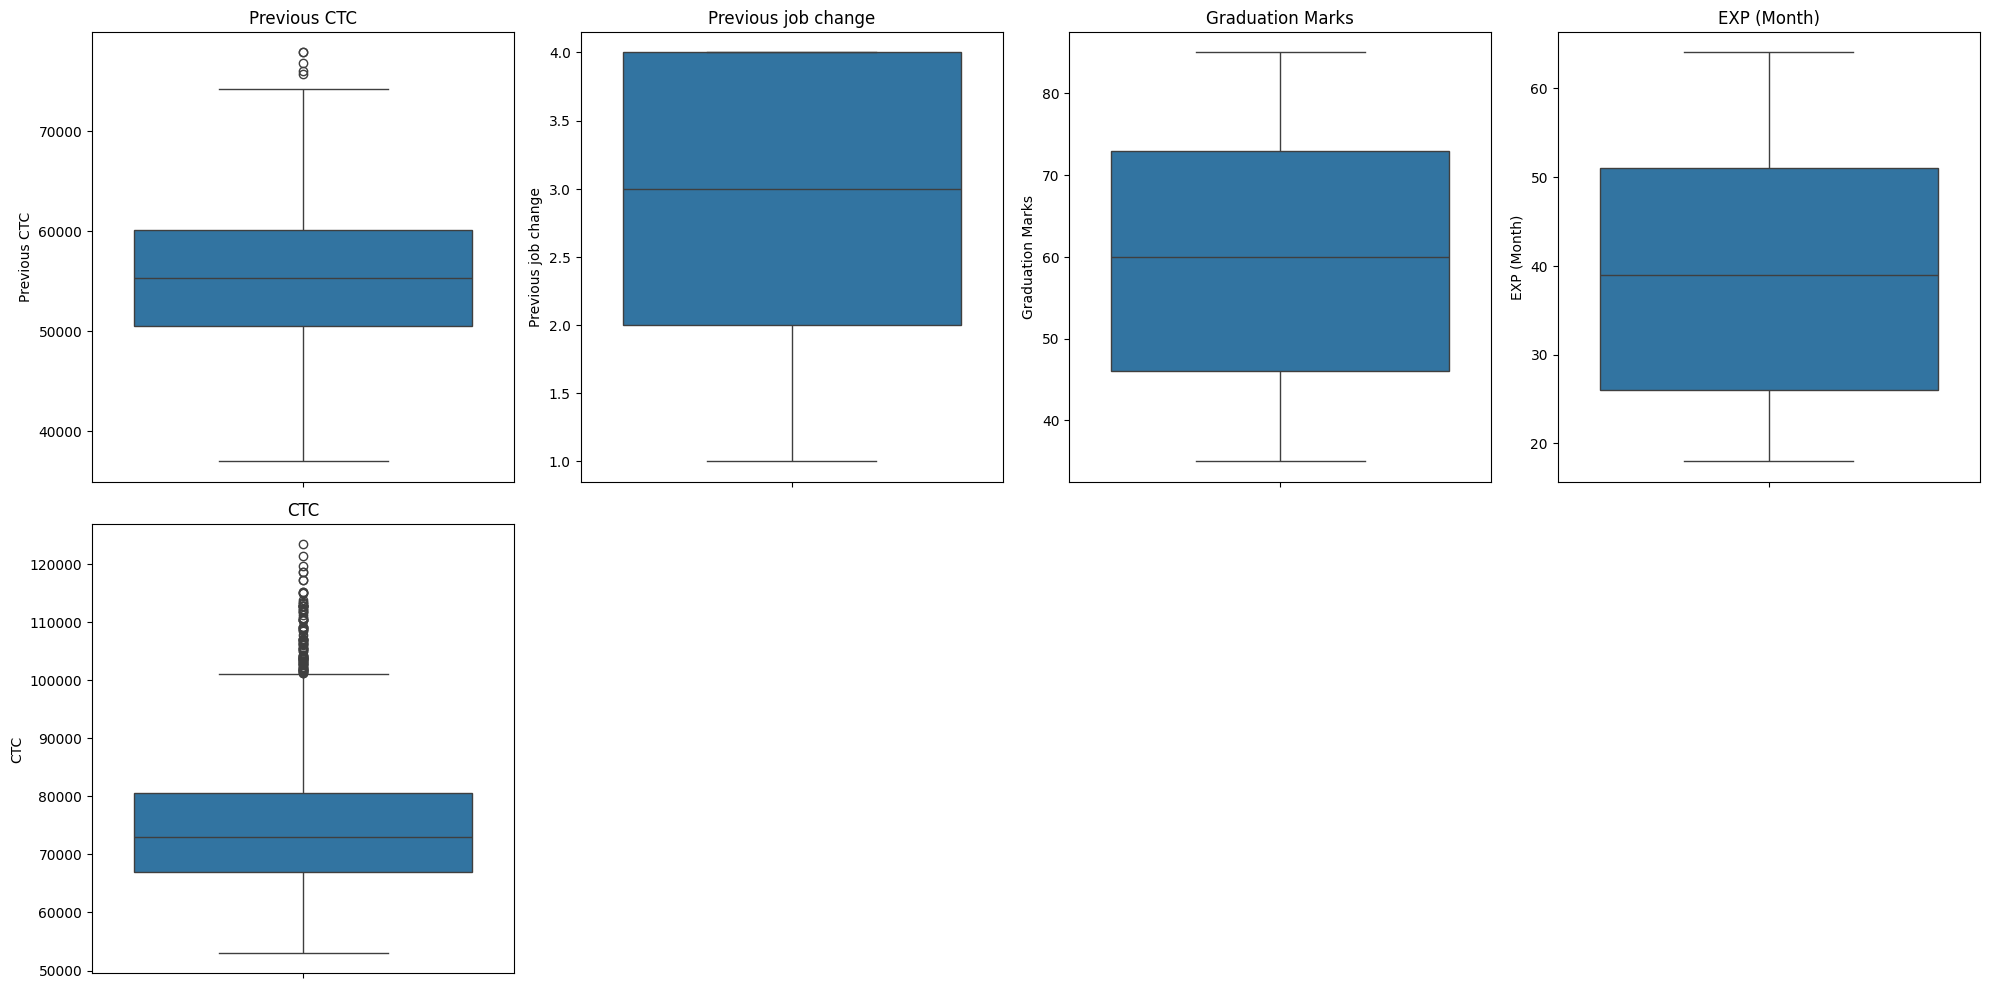

In [38]:
dfy= df.drop(['Role','College','City'],axis=1)
Q1 = dfy.quantile(0.25)
Q3 = dfy.quantile(0.75)
IQR = Q3 - Q1

outliers = ((dfy < (Q1 - 1.5 * IQR)) |(dfy > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_indices = dfy[outliers].index

outliers_count = outliers.sum()
# outliers_count
# Plot the data or model results using matplotlib
plt.figure(figsize=(20,10))
for i,column in enumerate(dfy.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=dfy[column])
    plt.title(column)
plt.tight_layout()
plt.show()

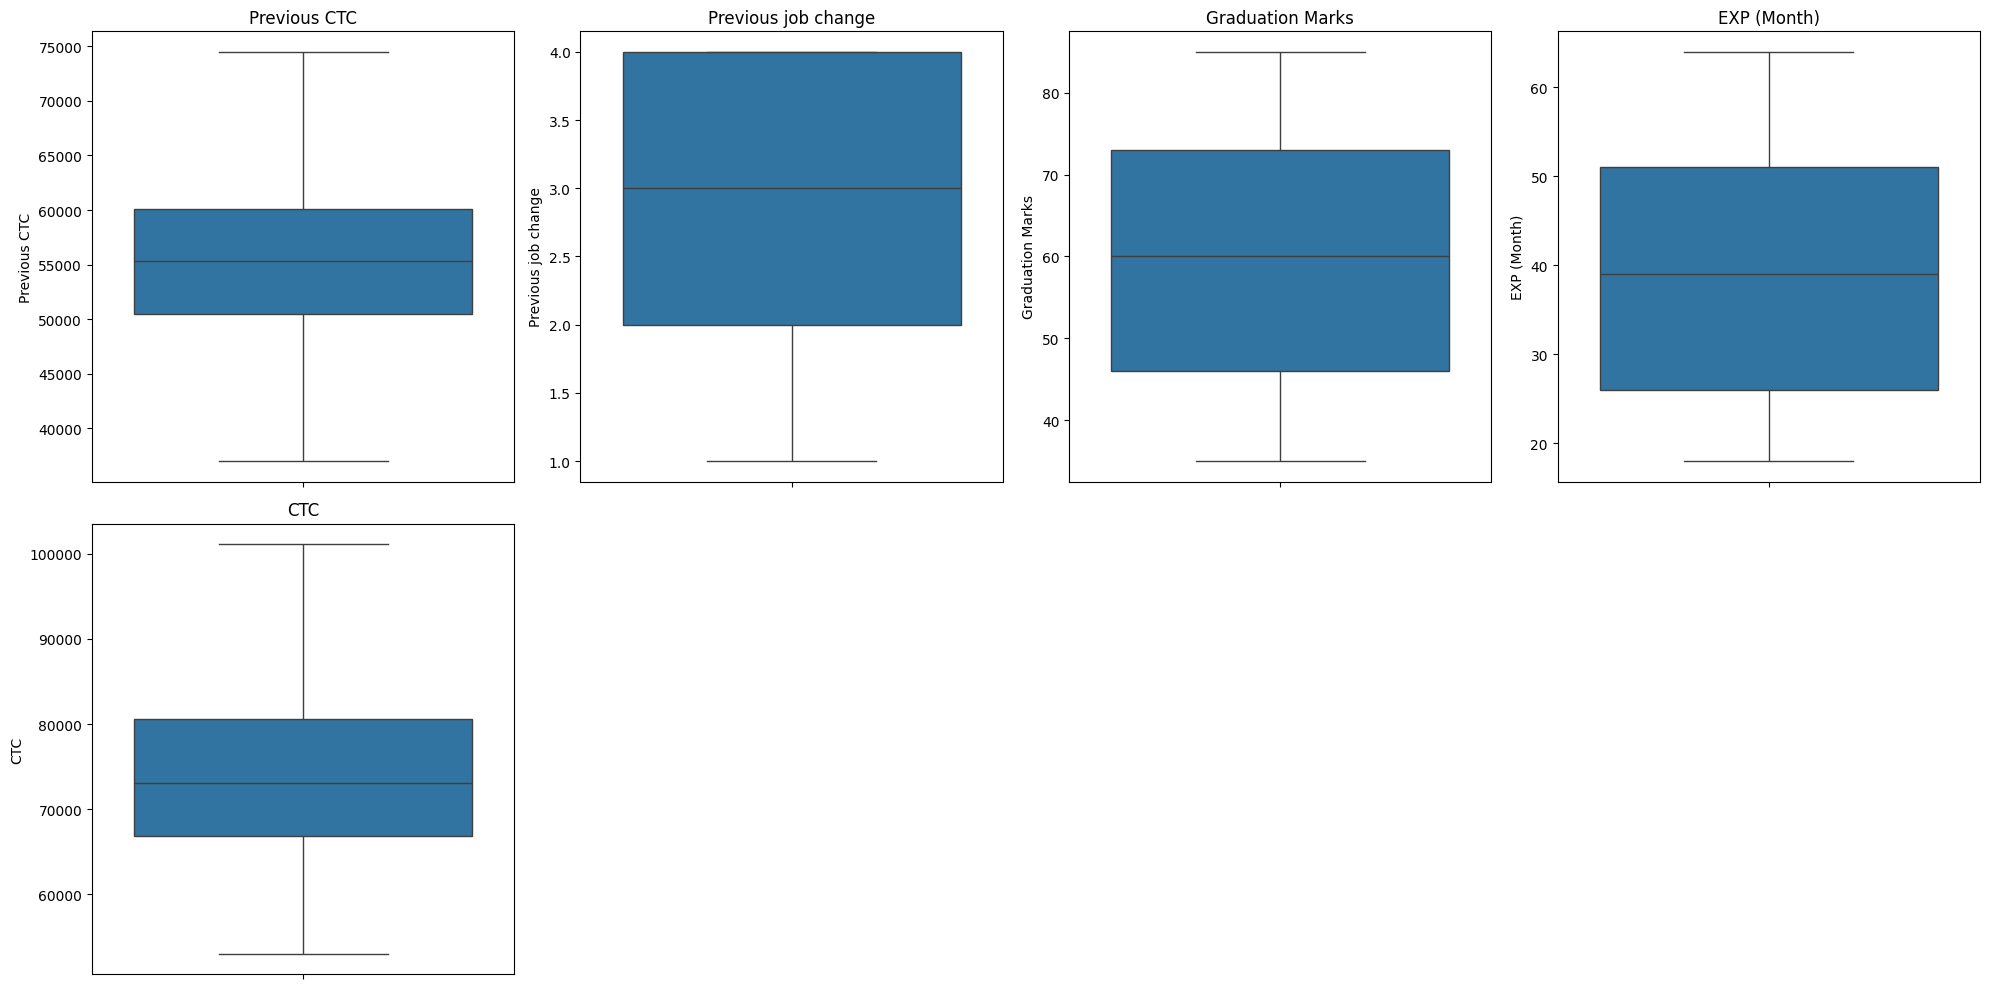

In [39]:
df_filtered = dfy.copy()

for feature in Q1.index:
    LB = Q1[feature] - 1.5 * IQR[feature]
    UB = Q3[feature] + 1.5 * IQR[feature]
    df_filtered[feature] = df_filtered[feature].clip(lower=LB, upper=UB)

plt.figure(figsize=(20,10))
for i,column in enumerate(df_filtered.columns,1):
    plt.subplot(2,4,i)
    sns.boxplot(data=df_filtered[column])
    plt.title(column)
plt.tight_layout()
plt.show()

* it seems to have some outliers in the 'Previous CTC' and 'CTC' column.

In [40]:
df_filtered['College'] = df['College']
df_filtered['Role'] = df['Role']
df_filtered['City'] = df['City']
df = df_filtered

In [41]:
df = pd.get_dummies(df, columns = ['College','Role','City'],drop_first= True)
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Tire2,College_Tire3,Role_Manager,City_Non_Metro
0,55523.0,3,66,19,71406.58,True,False,True,True
1,57081.0,1,84,18,68005.87,True,False,False,True
2,60347.0,2,52,28,76764.02,False,True,False,True
3,49010.0,2,81,33,82092.39,False,True,False,True
4,57879.0,4,74,32,73878.10,False,False,False,True


## Data Correlation

In [42]:
df_corr = df.corr()
CTC_corr = df_corr.CTC.drop(['CTC'],axis=0)
CTC_corr

,CTC
Previous CTC,0.246917
Previous job change,0.009485
Graduation Marks,-0.004665
EXP (Month),0.310451
College_Tire2,0.009366
College_Tire3,-0.027470
Role_Manager,0.611024
City_Non_Metro,0.026940


## Dependent(y) and Independent(x) Variable Creation

In [43]:
x = df.drop(['CTC'],axis=1).astype(float)
y = df['CTC'].astype(float)

## Prediction Models

### Linear Regression

#### Linear Regression model using single highest correlated field.

In [44]:
x_one = df[['Role_Manager']]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the dataset into training and testing sets
x_train, x_test, train_labels, test_labels = train_test_split(x_one, y, test_size=0.2, random_state=0)
# Fit the machine learning model to the training data
lm_reg_1 = LinearRegression()
lm_reg_1.fit(x_train, train_labels)

LinearRegression()

In [46]:
print("The R2 Score for the traing data: ",r2_score(train_labels,lm_reg_1.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,lm_reg_1.predict(x_test)))

The R2 Score for the traing data:  0.3651335343328055
The R2 Score for the testing data:  0.4063894714729136


#### Linear Regression model using multiple fields

In [47]:
# Split the dataset into training and testing sets
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=0)
# Fit the machine learning model to the training data
lm_reg_m = LinearRegression()
lm_reg_m.fit(x_train, train_labels)

LinearRegression()

In [48]:
print("The R2 Score for the traing data: ",r2_score(train_labels,lm_reg_m.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,lm_reg_m.predict(x_test)))

The R2 Score for the traing data:  0.5191525943476509
The R2 Score for the testing data:  0.5319130187832997


### Ridge Regression

In [49]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)
x_train_s = sc.transform(x_train)
x_test_s = sc.transform(x_test)

In [50]:
from sklearn.linear_model import Ridge
lm_reg_ridge = Ridge(alpha=0.5)
lm_reg_ridge.fit(x_train_s, train_labels)

Ridge(alpha=0.5)

In [51]:
print("The R2 Score for the traing data: ",r2_score(train_labels,lm_reg_ridge.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(test_labels,lm_reg_ridge.predict(x_test_s)))

The R2 Score for the traing data:  0.5191525186487738
The R2 Score for the testing data:  0.5318862177024227


### Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
lm_reg_lasso = Lasso(alpha=0.5)
lm_reg_lasso.fit(x_train_s, train_labels)

Lasso(alpha=0.5)

In [53]:
print("The R2 Score for the traing data: ",r2_score(train_labels,lm_reg_lasso.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(test_labels,lm_reg_lasso.predict(x_test_s)))

The R2 Score for the traing data:  0.5191525809235966
The R2 Score for the testing data:  0.5319164310141142


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor instance with the correct parameter
rf_regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

# Fit the model to the training data
rf_regressor.fit(x_train, train_labels)


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [55]:
print("The R2 Score for the traing data: ",r2_score(train_labels,rf_regressor.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,rf_regressor.predict(x_test)))

The R2 Score for the traing data:  0.9460219684986738
The R2 Score for the testing data:  0.6590808704975257


#### Grid Search

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor(n_jobs=-1, random_state=0)

param_grid = {
    'max_depth': range(3, 7, 2),
    'min_samples_leaf': [2, 3, 4],
    'n_estimators': [1000, 750]
}

grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)

grid_search.fit(x_train, train_labels)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_depth': range(3, 7, 2),
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [1000, 750]},
             scoring='neg_mean_absolute_error', verbose=1)

In [58]:
print("The R2 Score for the traing data: ",r2_score(train_labels,grid_search.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,grid_search.predict(x_test)))

The R2 Score for the traing data:  0.6606957690180826
The R2 Score for the testing data:  0.6180977959513334


In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=0)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

grid_search_rf.fit(x_train, train_labels)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [61]:
print(f"Best parameters for RandomForest: {grid_search_rf.best_params_}")
print(f"Best R² score on training data: {grid_search_rf.best_score_}")
print("The R2 Score for the testing data: ",r2_score(test_labels,grid_search_rf.predict(x_test)))

Best parameters for RandomForest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R² score on training data: 0.5733431843111559
The R2 Score for the testing data:  0.651835315258023


### K - Nearest Neighbors (KNN)

In [62]:
from sklearn.neighbors import KNeighborsRegressor
lrg_knn = KNeighborsRegressor(n_neighbors=20,n_jobs=-1)
lrg_knn.fit(x_train_s, train_labels)

KNeighborsRegressor(n_jobs=-1, n_neighbors=20)

In [63]:
print("The R2 Score for the traing data: ",r2_score(train_labels,lrg_knn.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(test_labels,lrg_knn.predict(x_test_s)))

The R2 Score for the traing data:  0.5538906497223286
The R2 Score for the testing data:  0.5370004533215423


#### Grid Search

In [64]:
from sklearn.model_selection import GridSearchCV

lrg_knn = KNeighborsRegressor(n_jobs=-1)
param = {'n_neighbors':range(1,55)}
grid_search = GridSearchCV(lrg_knn,param_grid=param)
grid_search.fit(x_train_s,train_labels)

GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),
             param_grid={'n_neighbors': range(1, 55)})

In [65]:
print(grid_search.best_params_)
opttimized_grid = grid_search.best_estimator_

{'n_neighbors': 20}


In [66]:
print("The R2 Score for the traing data: ",r2_score(train_labels,opttimized_grid.predict(x_train_s)))
print("The R2 Score for the testing data: ",r2_score(test_labels,opttimized_grid.predict(x_test_s)))

The R2 Score for the traing data:  0.5538906497223286
The R2 Score for the testing data:  0.5370004533215423


### XG Boost

In [68]:
import xgboost as xgb

xgb_lrg = xgb.XGBRegressor(max_depth=5, n_estimators=10000, learning_rate=0.3)
xgb_lrg.fit(x_train, train_labels)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
print("The R2 Score for the traing data: ",r2_score(train_labels,xgb_lrg.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,xgb_lrg.predict(x_test)))

The R2 Score for the traing data:  0.9999999999880768
The R2 Score for the testing data:  0.5988765714805082


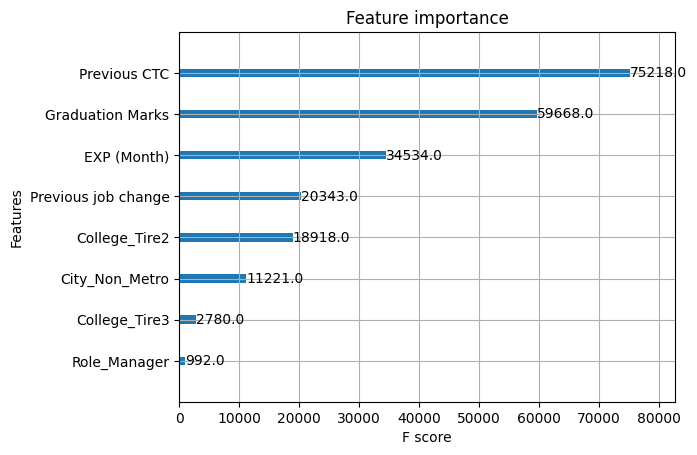

In [70]:
xgb.plot_importance(xgb_lrg)
plt.show()

### AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostRegressor

ada_lrg = AdaBoostRegressor(random_state=0, n_estimators=5000, learning_rate=0.02)
ada_lrg.fit(x_train, train_labels)


AdaBoostRegressor(learning_rate=0.02, n_estimators=5000, random_state=0)

In [73]:
print("The R2 Score for the traing data: ",r2_score(train_labels,ada_lrg.predict(x_train)))
print("The R2 Score for the testing data: ",r2_score(test_labels,ada_lrg.predict(x_test)))

The R2 Score for the traing data:  0.5879749605852811
The R2 Score for the testing data:  0.5914037091532521


In [76]:
from sklearn.ensemble import AdaBoostRegressor

ada_lrg = AdaBoostRegressor(random_state=0, n_estimators=5000, learning_rate=0.02)
ada_lrg.fit(x_train, train_labels)


AdaBoostRegressor(learning_rate=0.02, n_estimators=5000, random_state=0)

In [79]:
from sklearn.metrics import r2_score

print("The R2 Score for the training data: ", r2_score(train_labels, ada_lrg.predict(x_train)))
print("The R2 Score for the testing data: ", r2_score(test_labels, ada_lrg.predict(x_test)))


The R2 Score for the training data:  0.5879749605852811
The R2 Score for the testing data:  0.5914037091532521


#### Grid Search

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

ab_model = AdaBoostRegressor(random_state=0)

param_grid_ab = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square']
}

grid_search_ab = GridSearchCV(estimator=ab_model, param_grid=param_grid_ab, cv=3, n_jobs=-1, verbose=2)

grid_search_ab.fit(x_train, train_labels)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100]},
             verbose=2)

In [82]:
print(f"Best parameters for AdaBoost: {grid_search_ab.best_params_}")
print(f"Best R² score on training data: {grid_search_ab.best_score_}")
print("The R2 Score for the testing data: ",r2_score(test_labels,grid_search.best_estimator_.predict(x_test)))

Best parameters for AdaBoost: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100}
Best R² score on training data: 0.554821215957087
The R2 Score for the testing data:  -0.8376413111028678


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


## Results

1. **Linear Regression model using a single highest correlated field:**
   - Training Data R²: 0.3651
   - Testing Data R²: 0.4064

2. **Linear Regression model using multiple fields:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

3. **Ridge Regression:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

4. **Lasso Regression:**
   - Training Data R²: 0.5192
   - Testing Data R²: 0.5319

5. **Random Forest:**
   - Training Data R²: 0.9460
   - Testing Data R²: 0.6591

6. **Random Forest with Grid Search:**
   - Training Data R²: 0.5733
   - Testing Data R²: 0.6518

7. **K-Nearest Neighbors (KNN):**
   - Training Data R²: 0.5539
   - Testing Data R²: 0.5370

8. **K-Nearest Neighbors (KNN) with Grid Search:**
   - Training Data R²: 0.5539
   - Testing Data R²: 0.5370

9. **XGBoost:**
   - Training Data R²: 1.0000
   - Testing Data R²: 0.5989

10. **AdaBoost:**
    - Training Data R²: 0.5880
    - Testing Data R²: 0.5914

11. **AdaBoost with Grid Search:**
    - Training Data R²: 0.5548
    - Testing Data R²: 0.6180



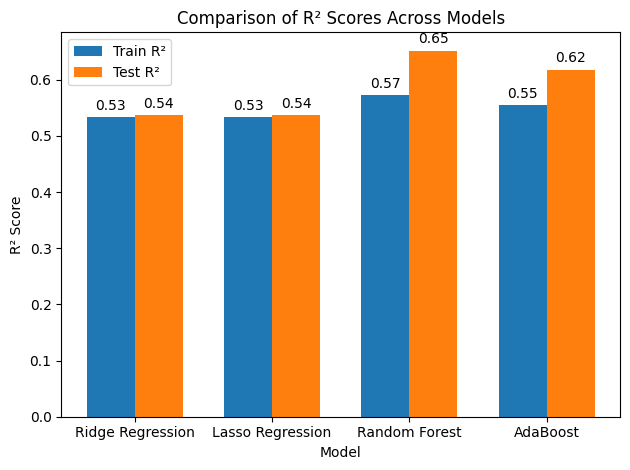

Ridge Regression: Training R² = 0.5335, Testing R² = 0.5367
 -> Ridge Regression does not show signs of overfitting.
Lasso Regression: Training R² = 0.5335, Testing R² = 0.5367
 -> Lasso Regression does not show signs of overfitting.
Random Forest: Training R² = 0.5733, Testing R² = 0.6518
 -> Random Forest does not show signs of overfitting.
AdaBoost: Training R² = 0.5548, Testing R² = 0.6181
 -> AdaBoost does not show signs of overfitting.


In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Ridge Regression', 'Lasso Regression', 'Random Forest', 'AdaBoost']
r2_train_scores = [0.5335037428213201,  # Ridge
                   0.533503809341541,   # Lasso
                   0.5733431843111559,  # RandomForest ( After GridSearch )
                   0.554821215957087]  # AdaBoost ( After GridSearch )

r2_test_scores = [0.5366536913347462,   # Ridge
                  0.5366734575952922,   # Lasso
                  0.651835315258023,    # RandomForest ( After GridSearch )
                  0.6180977959513334]   # AdaBoost ( After GridSearch )


x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, r2_train_scores, width, label='Train R²')
rects2 = ax.bar(x + width/2, r2_test_scores, width, label='Test R²')


ax.set_xlabel('Model')
ax.set_ylabel('R² Score')
ax.set_title('Comparison of R² Scores Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

for i in range(len(models)):
    print(f"{models[i]}: Training R² = {r2_train_scores[i]:.4f}, Testing R² = {r2_test_scores[i]:.4f}")
    if r2_train_scores[i] > r2_test_scores[i] + 0.05:
        print(f" -> {models[i]} may be overfitting.")
    else:
        print(f" -> {models[i]} does not show signs of overfitting.")


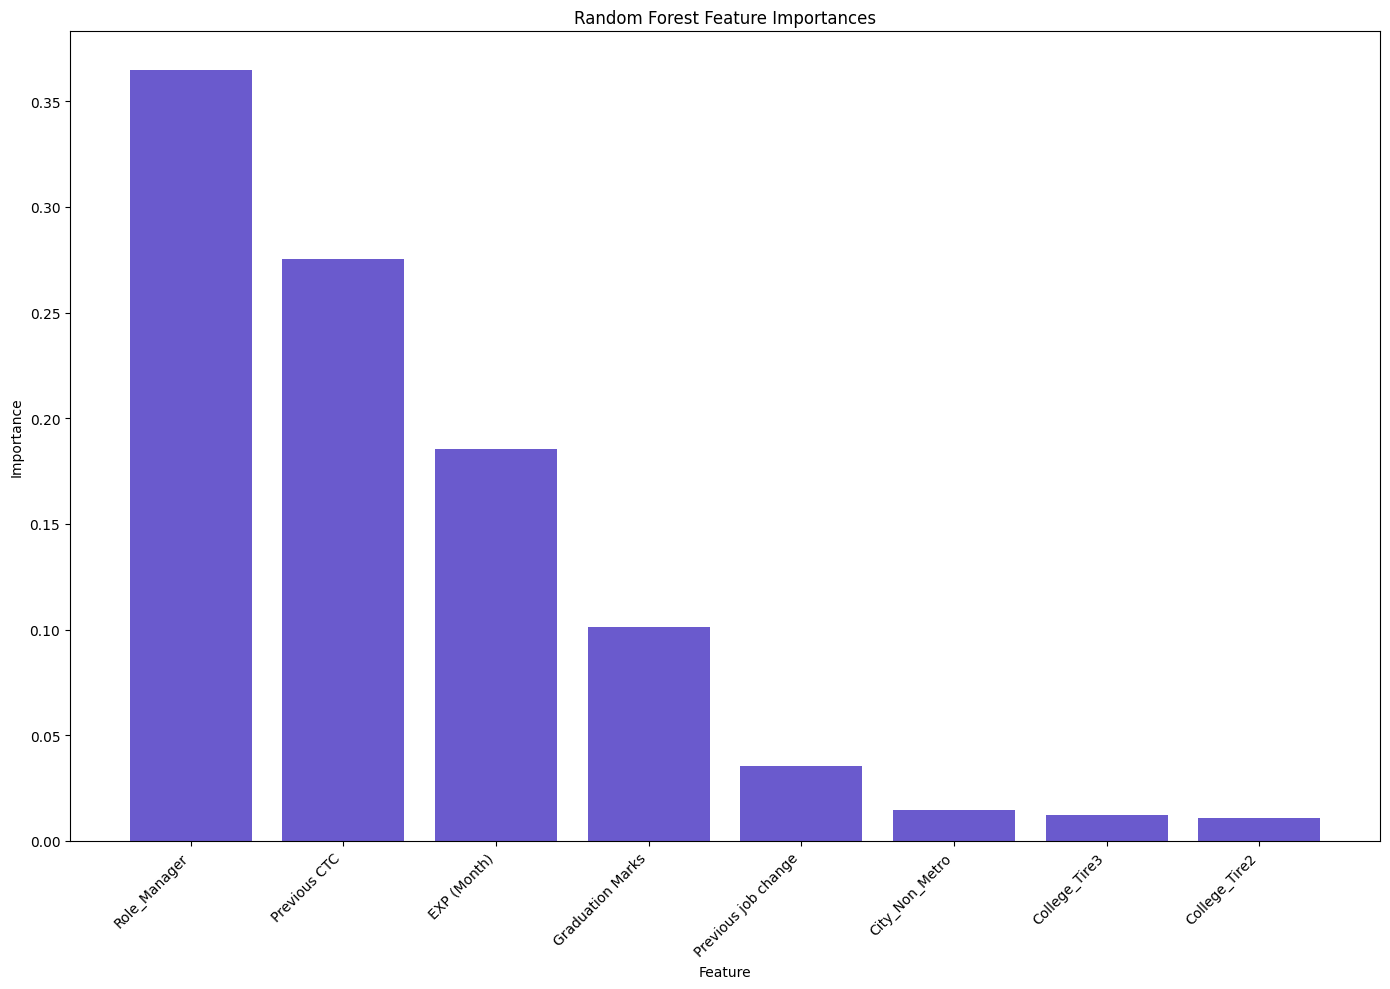

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

optimal_rf_model = grid_search_rf.best_estimator_

feature_importance_values = optimal_rf_model.feature_importances_
features = x_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance_values
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(14, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='slateblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()


**In the Random Forest model, the top three features influencing predictions are "*Role_Manager*," "*Previous CTC*" and "*EXP (Month)*". These features have shown significant impact on the model's performance, indicating that the role of a manager, prior compensation, and years of experience are crucial factors in determining the target variable.**